In [2]:
import sys

sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = '../Data/MD-PERMEATION/'
db_data = databank(path)
systems = db_data.get_systems()

In [141]:
import matplotlib.pyplot as plt
import json
import numpy as np

def CalcAreaPerMolecule(system):
    path = system['path']
    APLpath = path.replace('../Data/MD-PERMEATION/', '../../Databank/Data/Simulations/')
    APLpath = APLpath + 'apl.json'
    #try:
    f = open(APLpath)
    APLdata = json.load(f)
    sumAPL = 0
    sumIND = 0
    for i,j in APLdata.items():
        sumAPL += j
        sumIND += 1
    APL = sumAPL/sumIND
    return(APL)
    #except:
    #    print('apl.json not found from' + APLpath)
        
def calcArea(system):
    APL = CalcAreaPerMolecule(system)
    Nlipid = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            Nlipid += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    return Nlipid/(2*APL)

def GetThickness(system):
    path = system['path']
    ThicknessPath = path.replace('../Data/MD-PERMEATION/', '../../Databank/Data/Simulations/')
    ThicknessPath = ThicknessPath + 'thickness.json'
    try:
        f = open(ThicknessPath)
        thickness = json.load(f)
        return(thickness)
    except:
        pass
        print('thickness.json not found from' + system['path'])
    

def calcCholFraction(system):
    Nlipid = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            Nlipid += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    
    Nchol = 0
    for molecule in system['COMPOSITION']:
        if 'CHOL' in molecule:
            Nchol += np.sum(system['COMPOSITION'][molecule]['COUNT'])
            
    return Nchol/Nlipid

def chargedFraction(system):
    Nlipid = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            Nlipid += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    
    Ncharged = 0
    chargedlipids = ['POPG', 'POPS', 'DPPG', 'DOPS', 'POPI', 'SAPI', 'SLPI', 'DHMDMAB']
    for molecule in system['COMPOSITION']:
        if molecule in chargedlipids:
            Ncharged += np.sum(system['COMPOSITION'][molecule]['COUNT'])
            
    return Ncharged/Nlipid


def getHydrationLevel(system):
    Nlipid = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            Nlipid += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    Nwater = system['COMPOSITION']['SOL']['COUNT']
    return Nwater/Nlipid

def getWaterPermeationRate(system):
    path = system['path']
    with open(path + 'Counting_events.txt', 'r') as f:
        last_line = f.readlines()[-1]
    last_line = last_line.split()
    time = float(last_line[0])
    count = float(last_line[1])
    area = calcArea(system)
    rate = count / (time * area)
    return rate

def plotCorrelation(xProperty,yProperty,permeationResults):
    xPropertyData = []
    yPropertyData = []
    for ID in permeationResults:
        xPropertyData.append(permeationResults[ID][xProperty])
        yPropertyData.append(permeationResults[ID][yProperty])
    plt.plot(xPropertyData,yPropertyData,'.')

In [142]:
permeationVStemperature = {}
ID = 0
for system in systems:
    path = system['path']
    
    try:
        rate = getWaterPermeationRate(system)
    except:
        print('Water permeation failed' + path)
        continue
    
    APL = CalcAreaPerMolecule(system)
    
    thickness = GetThickness(system)

    hydration = getHydrationLevel(system)
    
    CholFraction = calcCholFraction(system)
    
    ChargedFraction = chargedFraction(system)
    
    temperature = system['TEMPERATURE']
    
    ID += 1
    permeationVStemperature[ID] = {
        'path': path, 
        'temperature': temperature ,
        'permeation': rate, 
        'APL': APL, 
        'CholFraction': CholFraction,
        'hydration': hydration,
        'thickness': thickness,
        'ChargedFraction': ChargedFraction
    }
        
        
    #!ls {path}
    #for key in system:
    #    print(key, ':',system[key])
    #print('')

Water permeation failed../Data/MD-PERMEATION/019/eb8/019eb8d7691998587faa1e618272a564ff9e697e/577a6cc9d00effd20baf941d520a23d91701352d/
Water permeation failed../Data/MD-PERMEATION/02b/984/02b98418d9965749ac943ecae9627cfdd1dfbdcd/7339faa76da6c93cfee03e59f399e2eed1628b53/
Water permeation failed../Data/MD-PERMEATION/0a4/101/0a41017641414540973e921ed22528d1f3dc414b/3c0936e61fa40cce74fd1828a2697742709e91fb/
Water permeation failed../Data/MD-PERMEATION/0bc/296/0bc296850dd41d32a6e9aa4ac2b5dd4e84a6605f/e64b1a6ceccc9a361529be902c17c2b4b0394484/
Water permeation failed../Data/MD-PERMEATION/0e9/f5e/0e9f5e64ad7244273eb2f544966ba7dd606fbbb1/2578273ee378997849b0bec8b8b3414797cdce73/
Water permeation failed../Data/MD-PERMEATION/0f2/d02/0f2d02d844c1290ae8e9b058d19e92065e71dd06/a5d989590567888284ba4d86b1cfe674af0f8c19/
Water permeation failed../Data/MD-PERMEATION/12e/fee/12efeef315c1170e422ed54450183e1b66b85485/3e707ddef01e5b1056299393f72cb65e3436fc15/
Water permeation failed../Data/MD-PERMEATION/144

Water permeation failed../Data/MD-PERMEATION/d7d/e4e/d7de4eb98126d515bf4b05457472d8d980c6ab2a/9245e3215d0b86b8fc83ef6b7ecff10c113dc50e/
Water permeation failed../Data/MD-PERMEATION/d8d/348/d8d348469625cce7a89646ba7160b7a89655bca9/9ef0a1a56cee2c014dea0be3ed2312ea264ca1e7/
Water permeation failed../Data/MD-PERMEATION/dc7/f14/dc7f14a4f247140f07204a8e14f5a2a5ff8f58ca/df63fa3bbb96e0f5fb742ac67341e02a3960e555/
thickness.json not found from../Data/MD-PERMEATION/deb/035/deb035658c6fe5b1199ffed00ec7cb43d986cb1d/38ef3210d00125cc0ca4daa27f169bf579dc3944/
thickness.json not found from../Data/MD-PERMEATION/f1c/b0f/f1cb0f7b3e7f2d34b844bd3ec237bfa4fe845e87/3dc850ad50ed06ef9677f7c6520756fdf2962880/
Water permeation failed../Data/MD-PERMEATION/f40/bb6/f40bb6ab5d44402be07059e8df74b5a8200f031e/6774168dfec0a5a7377c8a46341eba603f320cf7/
thickness.json not found from../Data/MD-PERMEATION/f56/a8b/f56a8b60e2500b0bf1c438187d8767fe79000b1e/232dca8fef7c81b3e0438d0ebdc2997f17df898e/
Water permeation failed../Data

(0.0, 0.2)

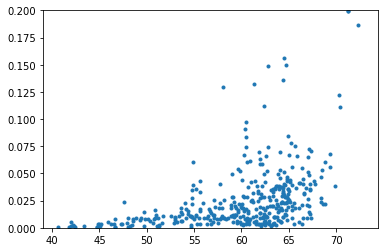

In [135]:
plotCorrelation('APL','permeation',permeationVStemperature)
plt.ylim([0,0.2])

(0.0, 0.2)

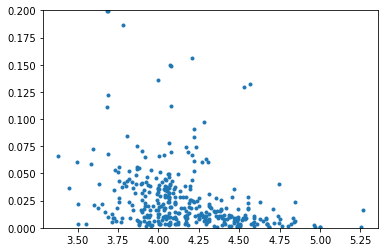

In [136]:
plotCorrelation('thickness','permeation',permeationVStemperature)
plt.ylim([0,0.2])

(0.0, 0.2)

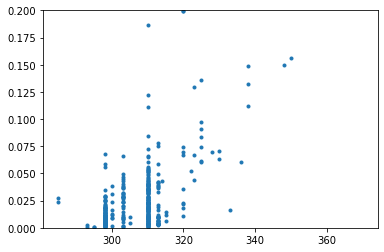

In [139]:
plotCorrelation('temperature','permeation',permeationVStemperature)
plt.ylim([0,0.2])

(0.0, 0.2)

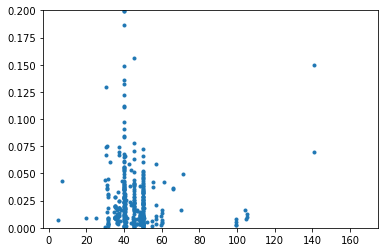

In [140]:
plotCorrelation('hydration','permeation',permeationVStemperature)
plt.ylim([0,0.2])

(0.0, 0.2)

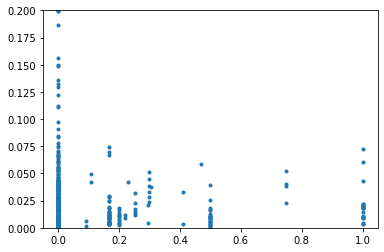

In [143]:
plotCorrelation('ChargedFraction','permeation',permeationVStemperature)
plt.ylim([0,0.2])

(0.0, 0.2)

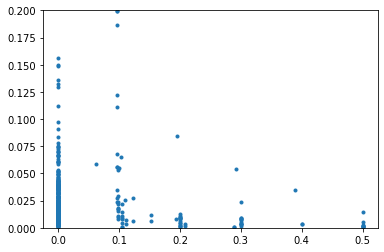

In [148]:
plotCorrelation('CholFraction','permeation',permeationVStemperature)
plt.ylim([0,0.2])

In [52]:
rates = []
temperatures = []
for ID in results:
    rate = results[ID]['count'] / results[ID]['time'] 
    rates.append(rate)
    

(array([121.,  78.,  48.,  26.,  21.,   8.,  14.,  11.,   9.,  14.,   6.,
          6.,   2.,   2.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   2.,
          1.,   1.,   1.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   1.,
          1.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.00000000e-03, 1.71124490e-02, 3.32248980e-02, 4.93373469e-02,
        6.54497959e-02, 8.15622449e-02, 9.76746939e-02, 1.13787143e-01,
        1.29899592e-01, 1.46012041e-01, 1.62124490e-01, 1.78236939e-01,
        1.94349388e-01, 2.10461837e-01, 2.26574286e-01, 2.42686735e-01,
        2.58799184e-01, 2.7491

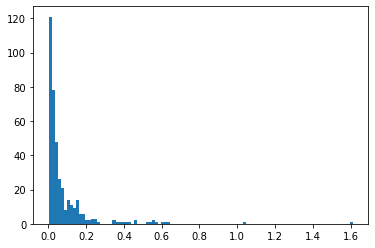

In [62]:
#plt.plot(rates)
plt.hist(rates,bins=100)

In [55]:
rates

[0.034,
 0.03,
 0.12,
 0.156,
 0.01,
 0.188,
 0.05,
 0.035,
 0.079,
 0.023333333333333334,
 0.0125,
 0.028,
 0.1290909090909091,
 0.02666666666666667,
 0.020004000119887972,
 0.036,
 0.024,
 0.007,
 0.575,
 0.192,
 0.02,
 0.08,
 0.08,
 0.005,
 0.005,
 0.05,
 0.2581453634085213,
 0.044444444444444446,
 1.04,
 0.002,
 0.03333333333333333,
 0.058,
 0.04666666666666667,
 0.01,
 0.458,
 0.015,
 0.015,
 0.012,
 0.055401662049861494,
 0.11428571428571428,
 0.03,
 0.0345,
 0.18333333333333332,
 0.18,
 0.01,
 0.132,
 0.112,
 0.0105,
 0.0071794871794871795,
 0.044,
 0.013333333333333334,
 0.0020512820512820513,
 0.24489795918367346,
 0.1530320366132723,
 0.001,
 0.12,
 0.05221932114882506,
 0.030949664859436458,
 0.002,
 0.15141540487162608,
 0.081377151799687,
 0.04000266537759411,
 0.012,
 0.0025,
 0.00875,
 0.04,
 0.01,
 0.08,
 0.116,
 0.022,
 0.06,
 0.008,
 0.04,
 0.1,
 0.02,
 0.03666666666666667,
 0.1477946017116524,
 0.07003501961085602,
 0.05,
 0.04,
 0.03,
 0.006667110896265685,
 0.01125